un peu plus de détail sur la manipulation de tenseurs

In [129]:
import torch
from torch import nn, tensor
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [6]:
training_data = datasets.MNIST(
    root="~/Ressources/MNIST",
    train=True,
    download=True,
    transform=ToTensor(),
    #target_transform = ToTensor()
)

In [125]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
########## indexing  / mult operation 

In [162]:
img = training_data.data[0:10]/255

In [163]:
img.shape

torch.Size([10, 28, 28])

In [216]:
img1 = img[0]
img1.size()

torch.Size([28, 28])

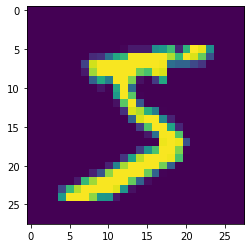

In [165]:
plt.imshow(img1)

torch.Size([14, 14])

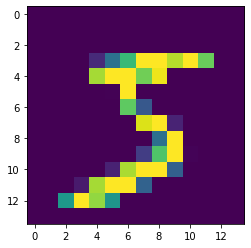

In [217]:
plt.imshow(img1[::2,::2])
img1[::2,::2].size()

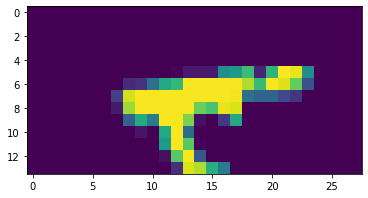

In [167]:
plt.imshow(img1[:14,:])

In [281]:
img[:,0,:20].shape

torch.Size([10, 20])

In [286]:
img[:,0:1,:20].shape

torch.Size([10, 1, 20])

In [288]:
a = img[:,0:1,:20].squeeze()
a.shape # -> enlève dimension à une seule valeur

torch.Size([10, 20])

In [171]:
a.unsqueeze(0).shape # ajoute dimension (par ex pour compatibilité avec opérations par batch)

torch.Size([1, 10, 20])

In [238]:
transfo = torch.rand(2,28)
transfo.shape

torch.Size([2, 28])

In [239]:
transfo[0]

tensor([0.5232, 0.3702, 0.1897, 0.6721, 0.6576, 0.9808, 0.7455, 0.2534, 0.2647,
        0.3751, 0.0238, 0.6828, 0.0517, 0.2101, 0.9491, 0.7338, 0.5112, 0.4772,
        0.6019, 0.3950, 0.0634, 0.7084, 0.2579, 0.3271, 0.3902, 0.9042, 0.5679,
        0.8786])

In [244]:
mult = transfo@img
# ou bien: mult = transfo.matmul(img)
mult.shape

torch.Size([10, 2, 28])

In [252]:
super_batch = torch.rand(30,2,3,3,28,28)
super_out = transfo@super_batch
super_out.shape #torch.Size([30, 2, 3, 2, 28])

torch.Size([30, 2, 3, 3, 2, 28])

In [246]:
# on peut nommer les dimensions pour s'y retrouver
img.names = ("batch","width","length")

In [248]:
mult = transfo@img
mult.names

('batch', None, 'length')

In [177]:
#######################################  cat / chunk / split ##############
#### exemple d'usage: faire des batchs simples 

In [178]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [256]:
training_data.data.chunk(10)[0].shape

torch.Size([5455, 28, 28])

In [180]:
# couper une image en 4 bandes, dans tout le batch
training_data.data.chunk(4,dim=1)[0].shape

torch.Size([60000, 7, 28])

In [255]:
chunks = training_data.data.chunk(10)
print(len(chunks))
torch.cat(chunks).shape

10


torch.Size([60000, 28, 28])

In [254]:
splits = training_data.data.split(1000)
print(len(splits))
splits[0].shape

60


torch.Size([1000, 28, 28])

In [257]:
torch.cat(splits).shape

torch.Size([60000, 28, 28])

In [259]:
torch.cat(chunks).shape

torch.Size([60000, 28, 28])

In [261]:
torch.cat(training_data.data.chunk(10)) == training_data.data

tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

In [278]:
### stack / unbind 

# stack remet une liste de tenseurs en un seul tenseur en ajoutant une dimension (différent de torch.cat)
print("%s x %s"%(len(chunks),chunks[0].shape))
new_t = torch.stack(chunks)
new_t.shape

10 x torch.Size([6000, 28, 28])


torch.Size([10, 6000, 28, 28])

In [280]:
new_c = torch.unbind(new_t)
print(len(new_c))
print(new_c[0].shape)

10
torch.Size([6000, 28, 28])


In [184]:
########### view ###########

In [215]:
x = torch.randn(4, 4)
x.shape, x.size()

(torch.Size([4, 4]), torch.Size([4, 4]))

In [186]:
y = x.view(16)
y.shape

torch.Size([16])

In [188]:
y = x.view(8,2)
y.shape

torch.Size([8, 2])

In [190]:
y = x.view(8,-1)
y.shape

torch.Size([8, 2])

In [191]:
x.view(9,2)# ne peut pas marcher 

RuntimeError: shape '[9, 2]' is invalid for input of size 16

In [211]:
############## exemple d'application le dataset bike #############
import numpy as np
import pandas as pds

In [223]:
bikes_pds = pds.read_csv("bike_hour.csv")
bikes_pds.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [229]:
print(bikes_pds.head()[["dteday","season","yr","temp","hum","cnt"]].to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
     dteday &  season &  yr &  temp &   hum &  cnt \\
\midrule
 2011-01-01 &       1 &   0 &  0.24 &  0.81 &   16 \\
 2011-01-01 &       1 &   0 &  0.22 &  0.80 &   40 \\
 2011-01-01 &       1 &   0 &  0.22 &  0.80 &   32 \\
 2011-01-01 &       1 &   0 &  0.24 &  0.75 &   13 \\
 2011-01-01 &       1 &   0 &  0.24 &  0.75 &    1 \\
\bottomrule
\end{tabular}



In [208]:
bikes_numpy = np.loadtxt("bike_hour.csv", 
                         dtype=np.float32, 
                         delimiter=",", 
                         skiprows=1, 
                         converters={1: lambda x: float(x[8:10])}) # <1>
bikes = torch.from_numpy(bikes_numpy)
bikes = bikes[:17376,:]  # divisible par 24
print(bikes.shape, bikes.stride()) # → torch.Size([17376, 17]), (17, 1)


torch.Size([17376, 17]) (17, 1)


In [230]:
daily = bikes.view(-1,24,bikes.shape[1])

In [236]:
bikes[0,7], daily[0,:,7]

(tensor(6.),
 tensor([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
         6., 6., 6., 6., 6., 6.]))

In [237]:
bikes[0,7] = 15
daily[0,:,7]

tensor([15.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
         6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.])